In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('homeprices_banglore.csv')

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [5]:
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))

In [6]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y = sx.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [10]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    
    no_of_features = x.shape[1]
    
    w = np.ones(shape=(no_of_features))
    b= 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T)+b # w1*feature1 + w2*feature2 + bias
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

In [15]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

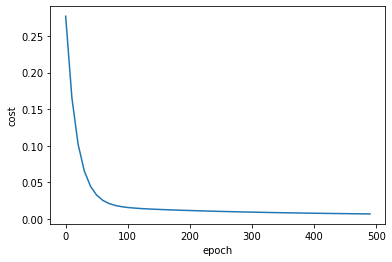

In [12]:

plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [20]:
sx.transform([[2600,4]])

array([[19.02222222, -0.20740741]])

In [17]:
def predict(area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])
predict(1334,4,w,b)